# **Introduction**

* Sound waves are **digitized** by sampling them at discrete intervals known as the **sampling rate** (typically 44.1kHz).
* Each sample is the **amplitude** of the wave at a particular time interval
* The **bit depth** determines how detailed the sample will be also known as the dynamic range of the signal (typically 16bit which means a sample can range from 65,536 amplitude values).
* A high sampling frequency results in **less information loss** but higher computational expense
* Low sampling frequencies have higher information loss but are fast and cheap to compute.

# **Loading audio data**
* Nyquist sampling theorm
> sampling frequency >= 2 * maximum frequency
* Max Frequency is part of prior knowledge

In [ ]:
import librosa
sr=44100
audio_data = '<path-to-wav file>'
x = librosa.load(audio_data,sr=44100)
print(type(x))

<class 'tuple'>


# **Playing audio data**

In [ ]:
!pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.4 MB/s eta 0:00:00


In [ ]:
import IPython.display as ipd

In [ ]:

# ipd.Audio(data = x[0],rate = 44100)   #method-1
ipd.Audio(audio_data)

# print(x[0])

## **Analyzing X**

## **What is X? What are it's components?**

In [ ]:
# what is x?
print(f'X : {x}')
print(f'Type of X : {type(x)}')
print(f'Length of X : {len(x)}')
print('\n')

print(f'X[0] : {x[0]}')
print(f'Type of elem-1 in X is array of samples: {type(x[0])}')
print('\n')

print(f'X[1] : {x[1]}')
print(f'Length of elem-1 in X : {len(x[0])}')
print(f'Type of elem-2 in X is Sampling rate : {type(x[1])}')

X : (array([ 3.9672852e-04, -5.4931641e-04,  2.7465820e-04, ...,
       -6.1035156e-05, -6.1035156e-05,  0.0000000e+00], dtype=float32), 44100)
Type of X : <class 'tuple'>
Length of X : 2


X[0] : [ 3.9672852e-04 -5.4931641e-04  2.7465820e-04 ... -6.1035156e-05
 -6.1035156e-05  0.0000000e+00]
Type of elem-1 in X is array of samples: <class 'numpy.ndarray'>


X[1] : 44100
Length of elem-1 in X : 1640175
Type of elem-2 in X is Sampling rate : <class 'int'>


# **Visualizing Audio Signal**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

## **Librosa Waveshow - Amplitude of sample vs Time - Time domain**

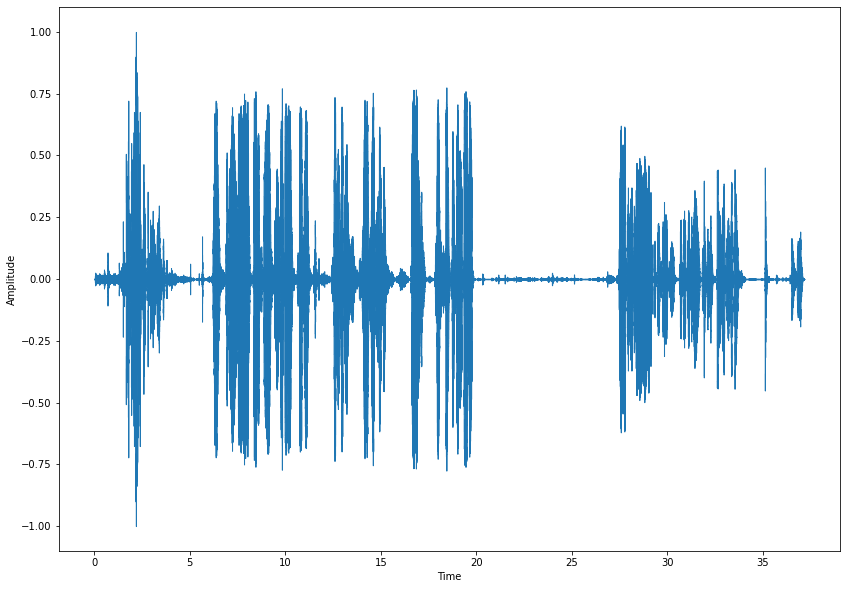

In [ ]:
plt.figure(figsize=(14,10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
librosa.display.waveshow(x[0],x[1])

## **Librosa Specshow - Spectogram**

## **STFT**
* Short Time Fourier Transform
* STFT represents a signal in the **time-frequency domain** by computing discrete Fourier transforms (DFT) over short overlapping windows.

In [ ]:
X = librosa.stft(x[0])
Xdb = librosa.amplitude_to_db(abs(X))

* STFT converts signals such that we can know the amplitude of the given frequency at a given time.
* Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.
* .specshow is used to display a spectrogram.

## **Spectogram**

> A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.

> Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

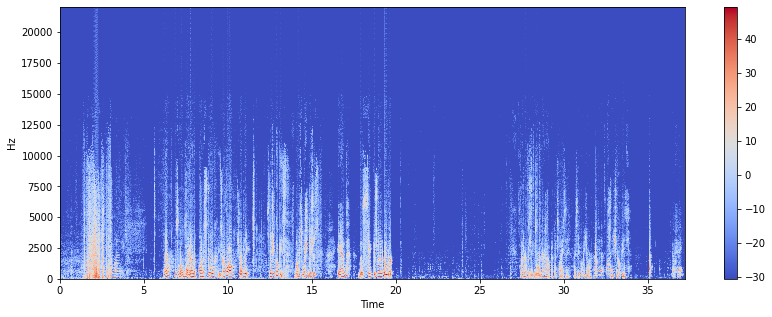

In [ ]:

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=44100
                         , x_axis='time', y_axis='hz')
plt.colorbar()


> Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

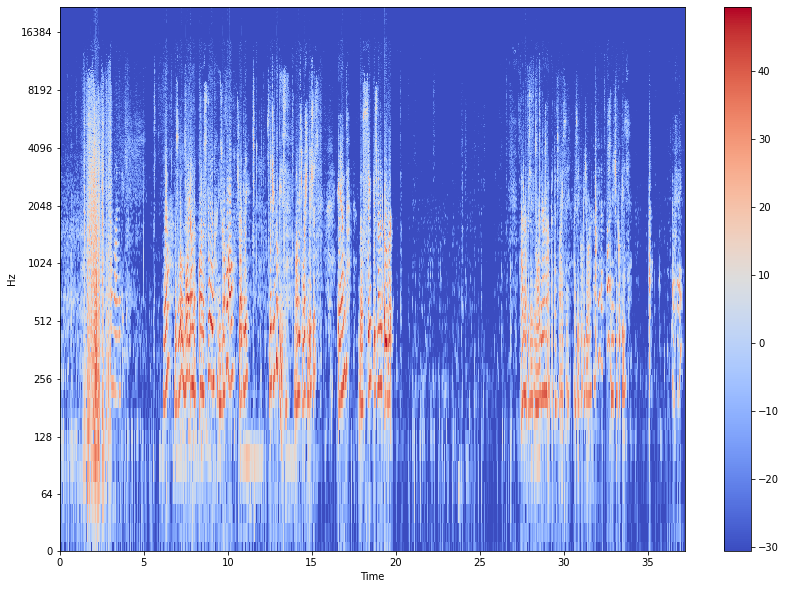

In [ ]:
plt.figure(figsize=(14, 10))
librosa.display.specshow(Xdb, sr=44100, x_axis='time', y_axis='log')
plt.colorbar()

# **Feature Extraction from audio signal**

* The **spectral features (frequency-based features)**, which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform
* like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

## **Spectral Centroid**
> The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located.

In [ ]:
centroids = librosa.feature.spectral_centroid(x[0],44100)
print(f'Spectral centroid : {centroids}')
print(f'Type of centroid : {type(centroids)}')
print(f'Length of centroid : {len(centroids)}')

print('\n\n')
print(f'Spectral centroid[0] : {centroids[0]}')
print(f'Type of centroid[0] : {type(centroids[0])}')
print(f'Length of centroid[0] : {len(centroids[0])}')

# doubt : arenrt we supposed to get one center of mass-val, why are we getting array?


Spectral centroid : [[7125.19574885 3104.4216902  1819.35685892 ... 4378.10984158
  5241.86495864 8637.45394131]]
Type of centroid : <class 'numpy.ndarray'>
Length of centroid : 1



Spectral centroid[0] : [7125.19574885 3104.4216902  1819.35685892 ... 4378.10984158 5241.86495864
 8637.45394131]
Type of centroid[0] : <class 'numpy.ndarray'>
Length of centroid[0] : 3204


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=1742cdcff636eb52c4337770d67c732da8fb1e18c2ecfe17e8af2eb75b60bd7e
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x[0], sr=sr)[0]
print(spectral_centroids[0:10])
print(normalize(spectral_centroids)[0:10])

[7125.19574885 3104.4216902  1819.35685892 1565.90193338 1558.57761342
 1603.01904049 1815.60396869 1795.41231975 1915.03370269 1787.7138948 ]
[0.81477277 0.32229283 0.16489313 0.13384899 0.13295188 0.13839523
 0.16443346 0.16196031 0.176612   0.16101737]


In [ ]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

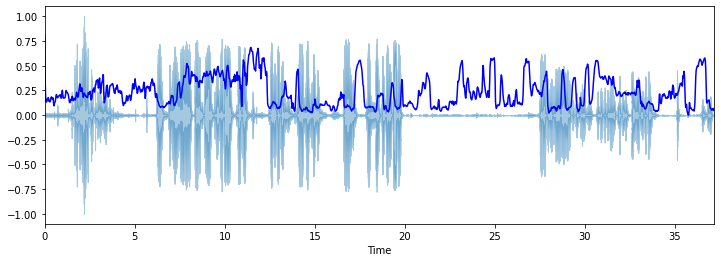

In [ ]:
plt.figure(figsize=(12, 4))
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x[0], sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')